In [1]:
#############                                                                                        #############

##### Óscar Angarita(1201748), Andrés Lindarte(1201397), James Romero(1201786), Daniel Sandoval(1201770) ########

############                                                                                         #############

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
# Permite mostrar el resultado de cada linea de la misma celda
import numpy as np #librería para computación científica
import pandas as pd #librería para analisis de datos
import seaborn as sns #librería para visualización de datos estadísticos
import matplotlib.pyplot as plt #librería para crear graficas 2D
import sklearn.linear_model as lm #libreria incluye modelo de regresión lineal

In [2]:
df=pd.read_csv('athlete_events.csv') #se guarda el dataset como un DF de Pandas
df.shape #para ver el tamaño(filasxcolumnas) del DF
df.describe() #Genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN
df.head() #Muestra las 5 primeras filas del DF
df.info() #Muestra un resumen conciso del DF
df = df[np.isfinite(df['Age'])] #Prueba los elementos para determinar la finitud (no infinito o no es un número). El resultado se devuelve como un arreglo booleano
df = df[np.isfinite(df['Height'])] #Esto para limpiar algunos datos NaN en estas tres columnas
df = df[np.isfinite(df['Weight'])]
df=df.sort_values('Year') #Se ordena el DF por año. Originalmente ordenado por 'ID'
#Reestablece el índice del DF y usa el predeterminado en su lugar
#El drop es para que no intente insertar un índice en las columnas del marco de datos. Esto restablece el índice al índice entero predeterminado 
df = df.reset_index(drop=True)
#Renombrar algunas columnas del DF para hacer clara las unidades que se manejan
df=df.rename(columns = {'Age':'Age (Years)','Height':'Height (cm)','Weight':'Weight (kg)'})
#Se crea un diccionario para poder cambiar los valores NaN de la columna 'Medal' por 'No Medal' y dejar claro que se refiere a que no se ganó medallas en ese espacio
values = {'Medal': 'No Medal'}
df=df.fillna(value=values) #fillna() es para rellenar los valores NaN de la forma que se especif
df.info() #Se imprime un resumen nuevo para ver los cambios
df.head() #Se imprime un head nuevo para ver los cambios
df.describe() #Se imprime un describe nuevo para ver los cambios

(271116, 15)

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206165 entries, 0 to 206164
Data columns (total 15 columns):
ID             206165 non-null int64
Name           206165 non-null object
Sex            206165 non-null object
Age (Years)    206165 non-null float64
Height (cm)    206165 non-null float64
Weight (kg)    206165 non-nu

,ID,Name,Sex,Age (Years),Height (cm),Weight (kg),Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,38860,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Shot Put,Gold
1,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,Gold
2,38860,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Discus Throw,Gold
3,22700,James Brendan Bennet Connolly,M,27.0,175.0,72.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,Bronze
4,38860,"Robert ""Bob"" Garrett",M,20.0,188.0,81.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,Silver


,ID,Age (Years),Height (cm),Weight (kg),Year
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678
std,38996.514355,5.483096,10.546088,14.340338,20.130865
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


False    24013
True        27
Name: NOC, dtype: int64

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Number of medals per NOC')

Text(0, 0.5, 'Total Medals')

Text(64, 500, '')

Text(64, 500, 'COLOMBIA')

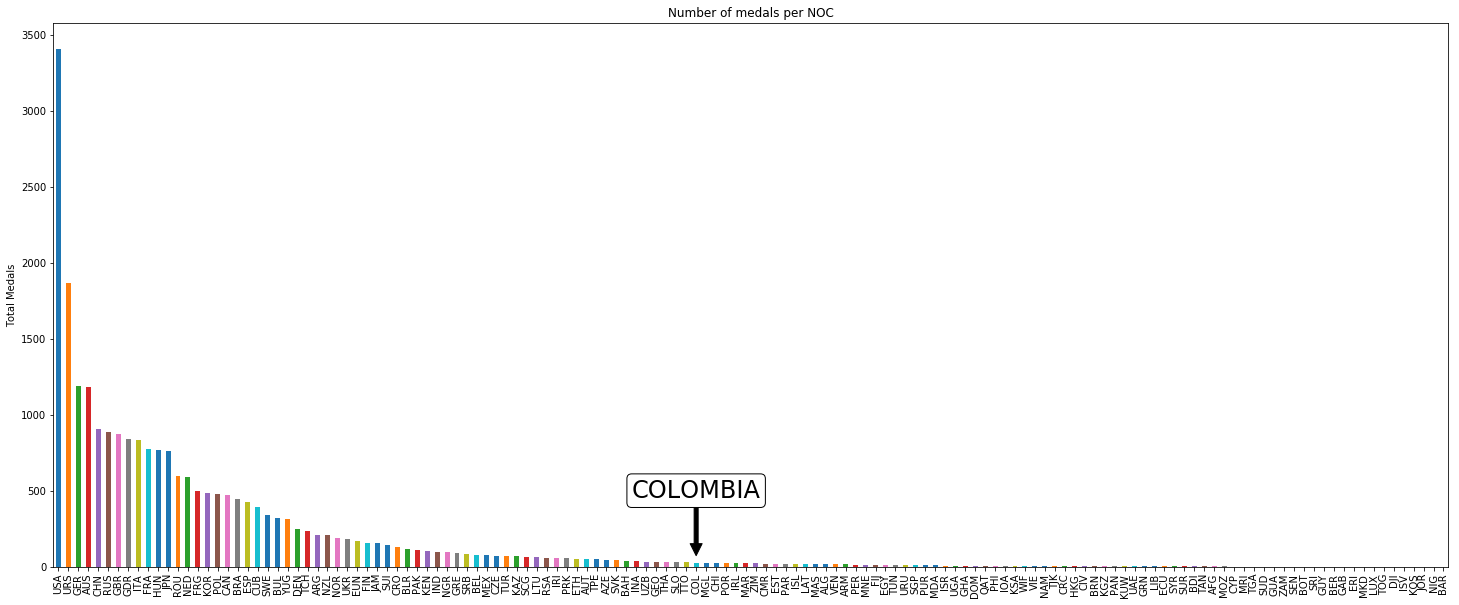

In [5]:
#Se guarda en una variable los datos del DF que cumplan con la condición especificada
totalYears=df['Year']>=1948 #Que el año sea mayor/igual a 1948 porque fue la 1ra aparición de Colombia en los olímpicos
totalMed=df['Medal']!='No Medal' #Especifica que se hayan ganado medallas
totalSummer=df['Season']=='Summer' #Especifica que sean juegos de verano ya que es donde Colombia participa comúnmente
#Se crea un arreglo booleano a partir del DF original con los datos que cumplan las 3 condiciones anteriores
totalMedals=df[totalMed & totalSummer & totalYears]
#Se crea un arreglo booleano a partir del anterior que tenga todos los datos de Colombia con las 3 condiciones anteriores
totalCOL=totalMedals['NOC']=='COL'
totalCOL.value_counts() #Para saber cuantos elementos verdaderos tiene el arreglo, que dice la cantidad de medallas de Colombia
#El contenedor de nivel superior para todos los elementos de graficado
plt.figure(figsize=(25,10)) #figsize define el tamaño(anchoxalto) de la gráfica
#Crea diagrama de barras a partir de las veces que aparezca un elemento de 'NOC' en el arreglo
totalMedals.NOC.value_counts().plot.bar()
plt.title('Number of medals per NOC')#Título del gráfico
plt.ylabel('Total Medals')#Label del eje Y
#Para dibujar la flecha y/o escribir texto, dibujar
plt.annotate('', #String con texto a escribir
            xy=(64, 50), #Posición donde apunta la flecha
            xycoords='data', #Tipo de coordenadas de la flecha y el texto
            xytext=(64, 500), #Posición donde se dibuja el texto
            arrowprops=
                {'facecolor':'black','shrink':0.05}) #Parametros de la flecha (color y compresión)
#Para escribir texto (posición, texto, atributos, encerrado en)
plt.text( 64,500, 'COLOMBIA',{'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
#Dibujar una gráfica
plt.show()

(945, 15)

,ID,Name,Sex,Age (Years),Height (cm),Weight (kg),Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4742,4681,Jaime Aparicio Rodewalt,M,18.0,170.0,63.0,Colombia,COL,1948 Summer,1948,Summer,London,Athletics,Athletics Men's 400 metres Hurdles,No Medal
4743,4681,Jaime Aparicio Rodewalt,M,18.0,170.0,63.0,Colombia,COL,1948 Summer,1948,Summer,London,Athletics,Athletics Men's 400 metres,No Medal
8292,31316,Emilio Echeverry de la Roche,M,27.0,175.0,68.0,Colombia,COL,1956 Summer,1956,Summer,Melbourne,Fencing,"Fencing Men's Sabre, Individual",No Medal
8293,31316,Emilio Echeverry de la Roche,M,27.0,175.0,68.0,Colombia,COL,1956 Summer,1956,Summer,Melbourne,Fencing,"Fencing Men's epee, Team",No Medal
8305,31316,Emilio Echeverry de la Roche,M,27.0,175.0,68.0,Colombia,COL,1956 Summer,1956,Summer,Melbourne,Fencing,"Fencing Men's epee, Individual",No Medal


,ID,Age (Years),Height (cm),Weight (kg),Year
count,945.000000,945.000000,945.000000,945.000000,945.000000
mean,63965.737566,24.985185,169.752381,64.868254,1994.205291
std,39962.490656,6.017963,9.047547,10.337798,18.654422
min,574.000000,12.000000,138.000000,38.000000,1948.000000
25%,25877.000000,21.000000,164.000000,58.000000,1976.000000
50%,74563.000000,24.000000,170.000000,64.000000,2000.000000
75%,99964.000000,28.000000,175.000000,71.000000,2012.000000
max,135441.000000,52.000000,205.000000,110.000000,2016.000000


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<Figure size 1440x720 with 0 Axes>

Text(0, 0.5, '')

Text(0.5, 1.0, '9 Mujeres Medallistas')

Text(0, 0.5, '')

Text(0.5, 1.0, '12 Hombres Medallistas')

Text(0, 0.5, '')

Text(0.5, 1.0, '21 Medallistas Totales')

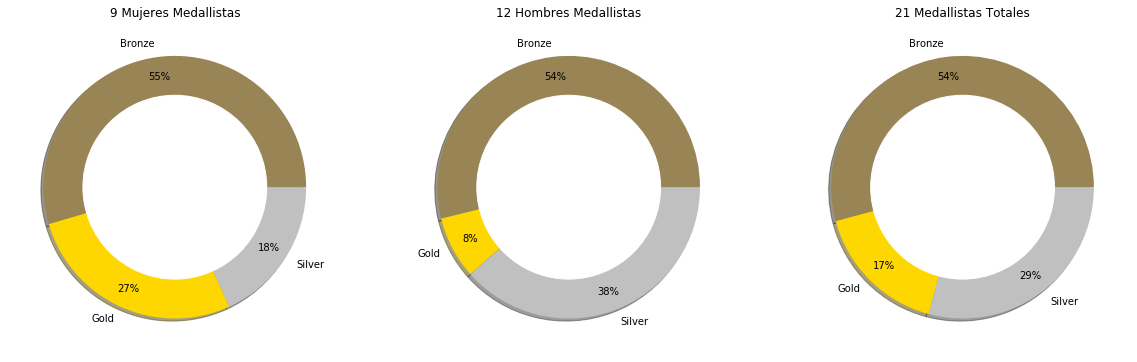

In [8]:
groupedCol=df[df['NOC']=='COL']#Crea DF a partir del original con datos solo de Colombia
groupedCol.shape #Para revisar los cambios recientes
groupedCol.head() #Para revisar los cambios recientes
groupedCol.describe() #Para revisar los cambios recientes
#Crea DF a partir del anterior pero con datos de medallistas de sexo femenino
groupedFem=groupedCol[groupedCol['Sex']=='F'][groupedCol['Medal']!='No Medal']
#Guarda en una variable la cantidad de datos únicos que hay de cada atleta femenina medallista
totFem=len(groupedFem['ID'].unique())
#Crea DF a partir del anterior pero con datos de medallistas de sexo masculino
groupedMal=groupedCol[groupedCol['Sex']=='M'][groupedCol['Medal']!='No Medal']
#Guarda en una variable la cantidad de datos únicos que hay de cada atleta masculino medallista
totMal=len(groupedMal['ID'].unique())
#Crea DF a partir del anterior pero con datos de medallistas tanto femeninos como masculinos
groupedTm=groupedCol[groupedCol['Medal']!='No Medal']
#Guarda en una variable la cantidad de datos únicos que hay de cada atleta masculino y femenino medallista
tot=len(groupedTm['ID'].unique())
#El contenedor de nivel superior para todos los elementos de graficado
plt.figure(figsize=(20,10)) #figsize define el tamaño(anchoxalto) de la gráfica
#Agrega una subgráfica a la figura actual
plt.subplot(131) #(N. filasxN.columnasxposición)
# nunique() se utiliza para obtener un recuento de valores únicos
#Se agrupan las mujeres por medalla y 'ID' único para hacer un diagrama de pie
#autopct da formato a los porcentajes(float con 1 punto decimal)
#shadow para dibujar una sombra al diagrama de pie
#pctdistance es la distancia del valor porcentaje al centro del diagrama
#colors son para dibujar cada parte del pie distinta
groupedFem.groupby("Medal")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                              shadow = True ,pctdistance=0.85, 
                                               colors = ["#998456","gold","silver"]) 
plt.ylabel("")#Label eje Y
#se dibuja un circulo blanco en el centro del diagrama de pie(y más pequeño) para dar efecto de dona
circ = plt.Circle((0,0),.7,color = "white")
#gca obtiene la instancia actual de Axes en la figura actual que coincide con los argumentos de palabra clave dados, o cree uno
#add_artist agrega un artista(Clase base para objetos que se representan en una FigureCanvas) a los ejes y devuelve el artista
plt.gca().add_artist(circ)
#Título del diagrama de pie para las mujeres convirtiendo en cadena el total calculado anteriormente
plt.title(str(totFem)+" Mujeres Medallistas")

plt.subplot(132)
groupedMal.groupby("Medal")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                              shadow = True ,pctdistance=0.85, 
                                               colors = ["#998456","gold","silver"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title(str(totMal)+" Hombres Medallistas")


plt.subplot(133)
groupedTm.groupby("Medal")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                              shadow = True ,pctdistance=0.85, 
                                               colors = ["#998456","gold","silver"])

plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title(str(tot)+" Medallistas Totales")

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

Text(0, 0.5, 'count')

Text(0.5, 1.0, 'Colombian athletes by gender over years for Summer Olympics')

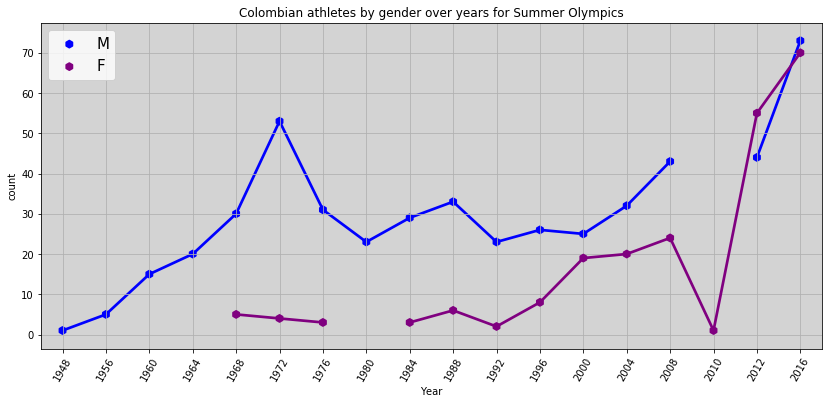

In [21]:
#Crea DF a partir de DF con datos de Colombia agrupado por Year, Sex y ID único de cada atleta con index por defecto 
groupedSex = groupedCol.groupby(["Year","Sex"])["ID"].nunique().reset_index()

fig = plt.figure(figsize=(14,6))
#crea pointplot de Seaborn
#grafo de Year vs ID único, dividido en lineas que representan a un Sex (Male en azul, Female en púrpura)
ax = sns.pointplot(x = groupedSex["Year"] , y = groupedSex["ID"],
                   markers="h" , hue = groupedSex["Sex"],palette = ["b","purple"])
#Crea grilla sobre el grafo y rota las variables del ejeX 60°
plt.grid(True)
plt.xticks(rotation = 60)
#Pasa el color de fondo del grafo en gris
ax.set_facecolor("lightgrey")
plt.ylabel("count")
plt.title("Colombian athletes by gender over years for Summer Olympics")
#Crea una leyenda en la mejor posición que considere Seaborn de tamaño 15
plt.legend(loc = "best" ,prop={"size":15})

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'Athletics'),
 Text(0, 0, 'Cycling'),
 Text(0, 0, 'Swimming'),
 Text(0, 0, 'Football'),
 Text(0, 0, 'Shooting'),
 Text(0, 0, 'Weightlifting'),
 Text(0, 0, 'Fencing'),
 Text(0, 0, 'Boxing'),
 Text(0, 0, 'Gymnastics'),
 Text(0, 0, 'Diving'),
 Text(0, 0, 'Wrestling'),
 Text(0, 0, 'Equestrianism'),
 Text(0, 0, 'Archery'),
 Text(0, 0, 'Tennis'),
 Text(0, 0, 'Rugby Sevens'),
 Text(0, 0, 'Judo'),
 Text(0, 0, 'Taekwondo'),
 Text(0, 0, 'Sailing'),
 Text(0, 0, 'Triathlon'),
 Text(0, 0, 'Table Tennis'),
 Text(0, 0, 'Synchronized Swimming'),
 Text(0, 0, 'Alpine Skiing'),
 Text(0, 0, 'Golf'),
 Text(0, 0, 'Rowing')]

Text(0.5, 1.0, 'Most sports participations of Colombia')

Text(-0.2, 196.5, '194')

Text(0.8, 163.5, '161')

Text(1.8, 114.5, '112')

Text(2.8000000000000003, 100.5, '98')

Text(3.8000000000000003, 58.5, '56')

Text(4.8, 57.5, '55')

Text(5.8, 49.5, '47')

Text(6.8, 47.5, '45')

Text(7.8, 35.5, '33')

Text(8.799999999999999, 26.5, '24')

Text(9.799999999999999, 23.5, '21')

Text(10.799999999999999, 21.5, '19')

Text(11.799999999999999, 18.5, '16')

Text(12.799999999999999, 15.5, '13')

Text(13.799999999999999, 14.5, '12')

Text(14.799999999999999, 14.5, '12')

Text(15.799999999999999, 11.5, '9')

Text(16.8, 8.5, '6')

Text(17.8, 5.5, '3')

Text(18.8, 5.5, '3')

Text(19.8, 4.5, '2')

Text(20.8, 4.5, '2')

Text(21.8, 3.5, '1')

Text(22.8, 3.5, '1')

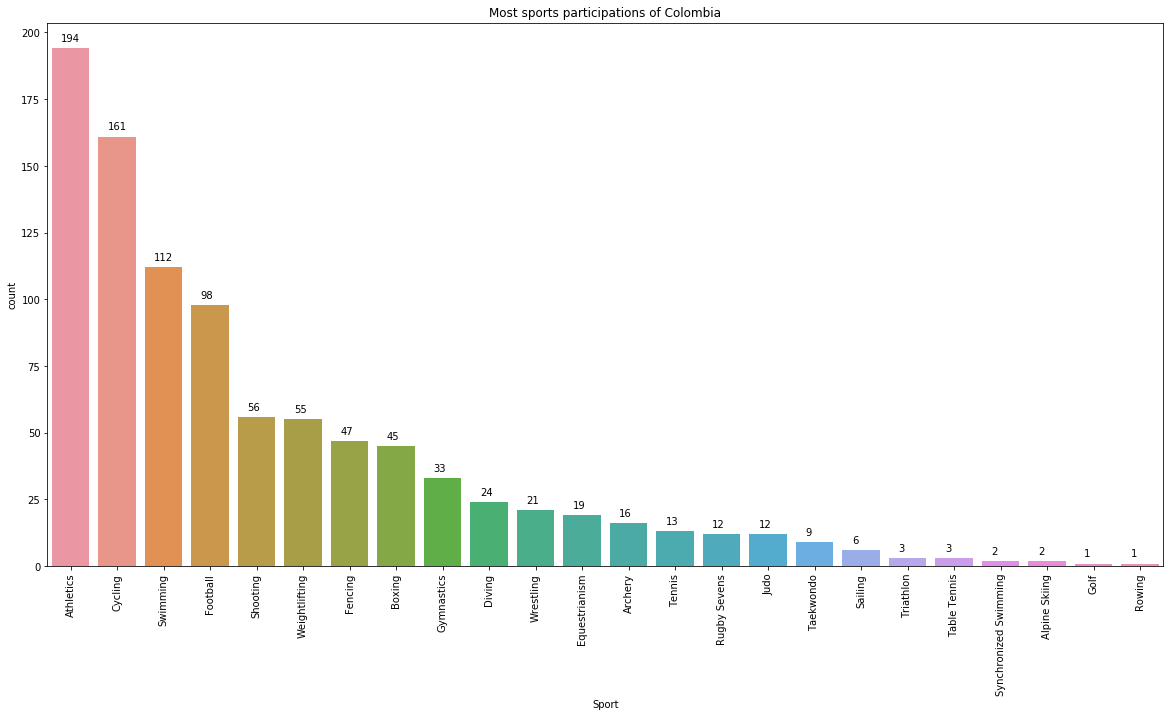

In [11]:
sportsCol=groupedCol['Sport'] #guarda en una variable todos los valores de la columna 'Sport' del DF de Colombia  
#El contenedor de nivel superior para todos los elementos de graficado
plt.figure(figsize=(20, 10)) #figsize asigna el anchoxalto del grafo
#Countplot de Seaborn muestra los conteos de observaciones en cada contenedor categórico usando barras
#(datos,orden) el orden en este caso es por valores repetidos de mayor a menor
graph=sns.countplot(sportsCol,order = sportsCol.value_counts().index)
#Para dar formato y especificar los datos de los valores del eje X
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.title('Most sports participations of Colombia')#titulo del grafo
#patches hace referencia a los elementos que se pueden dibujar sobre un grafo de Seaborn
#En este caso se anota la cantidad de atletas por deporte teniendo en cuenta el alto y ancho de las barras en el grafo
#para su visualización
for p in graph.patches:
        graph.annotate('{:}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+2.5))

<Figure size 1440x720 with 0 Axes>

Text(0, 0.5, '')

Text(0.5, 1.0, '945 Medallas de Oro')

Text(0, 0.5, '')

Text(0.5, 1.0, '945 Medallas de Plata')

Text(0, 0.5, '')

Text(0.5, 1.0, '14 Medallas de Bronce')

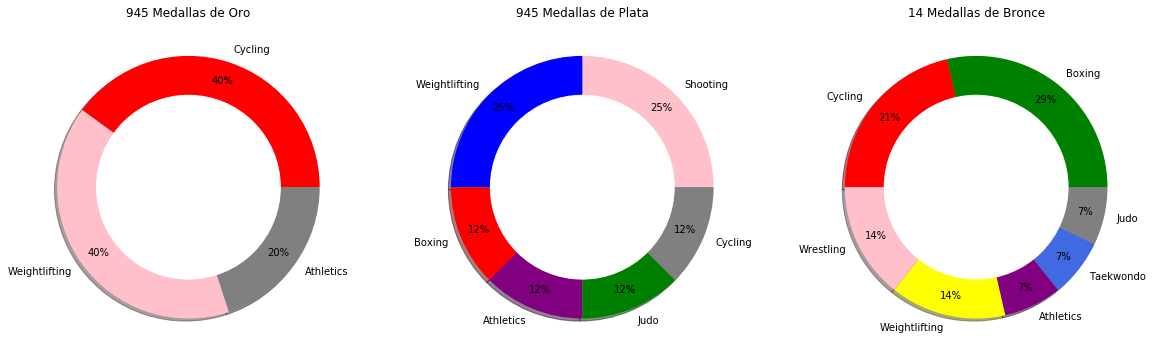

In [36]:
#En un DF se guarda el DF de los datos de Colombia pero teniendo en cuenta solo los ganadores de oro
groupedGold=groupedCol[groupedCol['Medal']=='Gold']
#En una variable se guarda la cantidad total de medallas de oro a partir del DF anterior
totGold=len(groupedCol['ID'])
#En un DF se guarda el DF de los datos de Colombia pero teniendo en cuenta solo los ganadores de plata
groupedSilv=groupedCol[groupedCol['Medal']=='Silver']
#En una variable se guarda la cantidad total de medallas de plata a partir del DF anterior
totSilv=len(groupedCol['ID'])
#En un DF se guarda el DF de los datos de Colombia pero teniendo en cuenta solo los ganadores de bronce
groupedBro=groupedCol[groupedCol['Medal']=='Bronze']
#En una variable se guarda la cantidad total de medallas de bronce a partir del DF anterior
totBro=len(groupedBro['ID'])
#El contenedor de nivel superior para todos los elementos de graficado
plt.figure(figsize=(20,10))#figsize asigna el anchoxalto del grafo
#Agrega una subgráfica a la figura actual
plt.subplot(131) #(N. filasxN.columnasxposición)
#Se crea un diagrama de pie a partir del conteo de los valores de la columna 'Sport' del DF de oro
#autopct le da formato con 1 decimal
#shadow le dibuja una sombra
#pctdistance es la distancia de los valores al centro del pie
#colors son los colores que representan cada deporte
groupedGold.Sport.value_counts().plot.pie(autopct = "%1.0f%%",
                                              shadow = True ,pctdistance=0.85,
                                                      colors=['red','pink','gray'])
plt.ylabel("") #label del eje Y
#Crea circulo blanco en el centro y más pequeño que el pie para dar el efecto de dona
circ = plt.Circle((0,0),.7,color = "white")
#gca obtiene la instancia actual de Axes en la figura actual que coincide con los argumentos de palabra clave dados, o cree uno
#add_artist agrega un artista(Clase base para objetos que se representan en una FigureCanvas) a los ejes y devuelve el artista
plt.gca().add_artist(circ)
#título del diagrama + cantidad de medallas de oro
plt.title(str(totGold)+" Medallas de Oro")

plt.subplot(132)
groupedSilv.Sport.value_counts().plot.pie(autopct = "%1.0f%%",
                                              shadow = True ,pctdistance=0.85,
                                                     colors=['pink','blue','red','purple','green',
                                                              'gray']) 
plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title(str(totSilv)+" Medallas de Plata")


plt.subplot(133)
groupedBro.Sport.value_counts().plot.pie(autopct = "%1.0f%%",
                                              shadow = True ,pctdistance=0.85,
                                                    colors=['green','red','pink','yellow','purple',
                                                              'royalblue','gray'])

plt.ylabel("")
circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(circ)
plt.title(str(totBro)+" Medallas de Bronce")

plt.show()

(6, 15)

,ID,Name,Sex,Age (Years),Height (cm),Weight (kg),Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29,32330,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",Silver
37,32330,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, One Hand",Gold
179,64683,Frank X. Kugler,M,25.0,170.0,75.0,Germany,GER,1904 Summer,1904,Summer,St. Louis,Weightlifting,Weightlifting Men's All-Around Dumbbell Contest,Bronze
183,64683,Frank X. Kugler,M,25.0,170.0,75.0,Germany,GER,1904 Summer,1904,Summer,St. Louis,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",Bronze
234,17647,Tullio Camillotti,M,26.0,175.0,98.0,Italy,ITA,1906 Summer,1906,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, One Hand",Silver


<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Number of medals in weightlifting per NOC')

Text(0, 0.5, 'Total Medals')

Text(26, 20, '')

Text(26, 20, 'COLOMBIA')

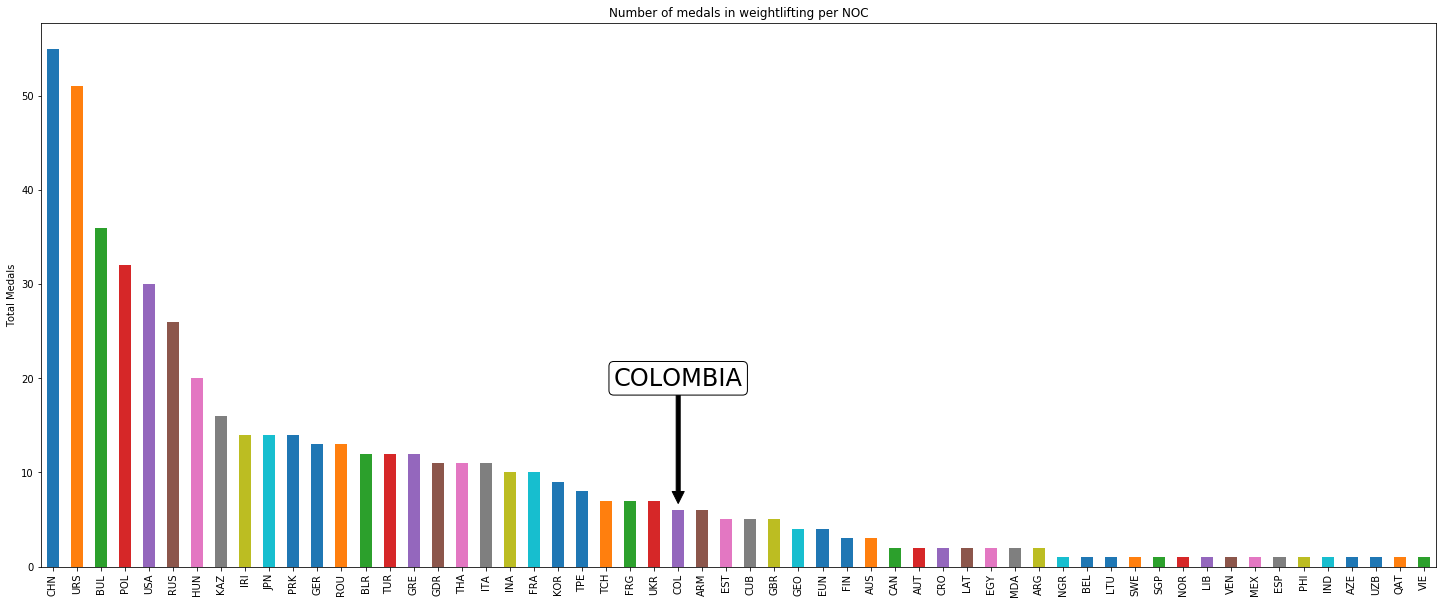

In [35]:
#Crea un arreglo booleano a partir del DF original donde aloja la condición de que los datos correspondan a 'Weightlifting'
totalWeightLift=df['Sport']=='Weightlifting'
#Crea un DF a partir del original cuyos datos cumplan con ser de medallistas, en los juegos de verano, y que el deporte sea Weightlifting
dfWeightLift=df[totalMed & totalSummer & totalWeightLift]
Colombia=dfWeightLift[dfWeightLift['NOC']=='COL']
Colombia.shape
dfWeightLift.head()#Imprime las 5 primeras filas para ver el resultado
#Crea una figura con tamaño determinado
plt.figure(figsize=(25,10))
#Crea un diagrama de barras a partir del número de medallas por NOC de la columna NOC del DF anterior
dfWeightLift.NOC.value_counts().plot.bar()
plt.title('Number of medals in weightlifting per NOC')
plt.ylabel('Total Medals')

#para dibujar la flecha de color negro apuntando a (27,6)
plt.annotate('',
            xy=(26, 6),
            xycoords='data',
            xytext=(26, 20),
            arrowprops=
                {'facecolor':'black','shrink':0.05})
#para dibujar el texto de color negro, centrado, y en la posición (27,20), rodeado por una caja redondeada
plt.text( 26,20, 'COLOMBIA',{'color': 'black', 'fontsize': 24, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})

plt.show()

,Year,ID
0,1984,10
1,1988,10
2,1992,3
3,1996,10
4,2000,10


,Year,ID
0,1956,1
1,1960,2
2,1972,2
3,1976,2
4,1984,5


,Year,ID
0,1952,2
1,1956,2
2,1960,6
3,1964,7
4,1968,7


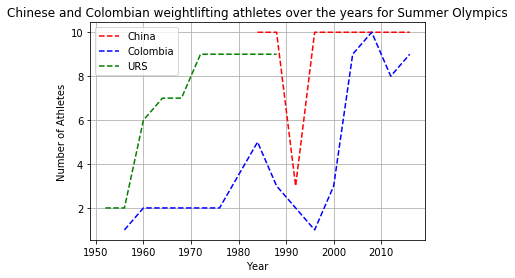

In [23]:
china=df['NOC']=='CHN' #Crea variable donde se guardan los datos del DF original con datos de China
colom=df['NOC']=='COL' #Crea variable donde se guardan los datos del DF original con datos de Colombia
urs=df['NOC']=='URS' #Crea variable donde se guardan los datos del DF original con datos de la URS
wei=df['Sport']=='Weightlifting' #Crea variable donde se guardan los datos del DF original con datos de Weightlifting
#Crea DF a partir del original con datos del Weightlifting en China
dfChi=df[china & wei ]
#Crea DF a partir del original con datos del Weightlifting en Colombia
dfColo=df[colom & wei]
#Crea DF a partir del original con datos del Weightlifting en la URS
dfUrs=df[urs & wei]
#Agrupa el DF de China por año y por ID(atleta) único
#Restableece el índice del DF y use el predeterminado en su lugar.
dfChi = dfChi.groupby("Year")["ID"].nunique().reset_index()
#Agrupa el DF de Colombia por año y por ID(atleta) único
#Restableece el índice del DF y use el predeterminado en su lugar.
dfColo = dfColo.groupby("Year")["ID"].nunique().reset_index()
#Agrupa el DF de la URS por año y por ID(atleta) único
#Restableece el índice del DF y use el predeterminado en su lugar.
dfUrs = dfUrs.groupby("Year")["ID"].nunique().reset_index()
#Muestra el head de cada uno para visualizar los cambios
dfChi.head()
dfColo.head()
dfUrs.head()
#Crea un diagrama de lineas punteadas de Year vs ID con cada DF
_=plt.plot(dfChi['Year'],dfChi['ID'],'--r',color='red',label='China')
_=plt.plot(dfColo['Year'],dfColo['ID'],'--b',color='blue',label='Colombia')
_=plt.plot(dfUrs['Year'],dfUrs['ID'],'--g',color='green',label='URS')
#Crea una leyenda para diferenciar visualmente a qué DF corresponde cada linea
_=plt.legend(loc='upper left')
_=plt.xlabel('Year')#label eje x
_=plt.ylabel('Number of Athletes')#label eje y
_=plt.title('Chinese and Colombian weightlifting athletes over the years for Summer Olympics')
plt.grid()#Para dibujar una grilla de lineas sobre el grafo
plt.show()

,Year,ID
0,1896,9
1,1900,20
2,1904,34
3,1906,45
4,1908,106


,Year,ID
0,1896,11
1,1900,34
2,1904,52
3,1906,77
4,1908,187


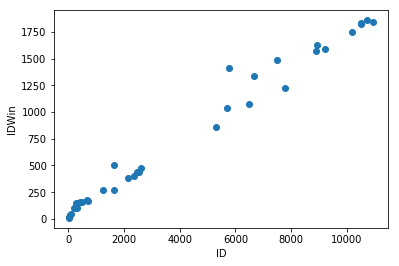

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Pendiente:  0.16979518389053866
Intercepción:  60.540333143973726


array([145.43792509])

0.9815923529980868

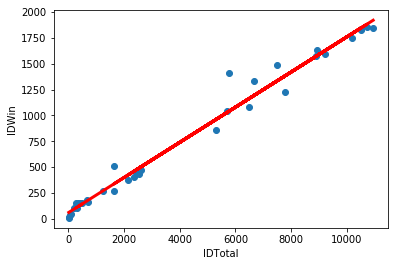

In [24]:
#Crea DF a partir del original con los datos de los medallistas
dfMedallas=df[df['Medal']!='No Medal']
#Agrupa el DF de los medallistas por Year, deja el index por defecto
#agg= Agregación usando una o más operaciones sobre el eje especificado. 
#En este caso se agregan al grupo los ID únicos
dfWinners=dfMedallas.groupby(['Year'],as_index=False).agg({'ID': pd.Series.nunique})
#Agrupa un DF de todos los atletas por Year, deja el index por defecto y agrega al grupo los ID únicos
dfComplete=df.groupby(['Year'],as_index=False).agg({'ID': pd.Series.nunique})
#imprime las 1ras 5 filas de ambos DF para ver su contenido
dfWinners.head()
dfComplete.head()
#Crea un gráfico Scatter= en el que los valores de 2 variables se trazan a lo largo de 2 ejes, el patrón de los puntos resultantes revela cualquier correlación presente 
#(Datax,Datay)
#Grafo lo crea de ID de todos los atletas vs ID de todos los medallistas
_=plt.scatter(dfComplete['ID'],dfWinners['ID'])
_=plt.xlabel('ID')#label eje x
_=plt.ylabel('IDWin')#label eje y
plt.show()#muestra el grafo
#newaxis=utilizado para aumentar la dimensión de la matriz existente en una dimensión más, cuando se utiliza una vez
#Al DF de ID de todos los atletas se le vuelve 2D con todos sus valores y se guarda en x 
x=dfComplete.ID[:,np.newaxis]
#Al DF de ID de medallistas se le toman todos sus valores en forma de serie y se guardan en y
y=dfWinners['ID'].values
#La regresión lineal es una forma de predecir una respuesta Y sobre la base de una sola variable predictiva X
#Se supone que existe una relación lineal aproximadamente entre X e Y
lr=lm.LinearRegression() # Crear instancia de linea de regresión
lr.fit(x,y)#fit se usa para entrenar el modelo a partir de los datos x,y 
b=lr.coef_[0]#hace referencia a la pendiente de la recta resultante
a=lr.intercept_#hace referencia al punto de intercepción de la recta resultante
print('Pendiente: ',b)
print('Intercepción: ',a)

lr.predict([[500]]) # Dada una delegación de 500 atletas el modelo predice que podrían haber 145 medallistas aprox.
lr.score(x,y) # El score 0.98 dice que el modelo fue bueno, pero, siempre entre más datos se tomen, mejor la regresión
_2=plt.scatter(x,y)
#Se dibuja en rojo la recta resultante de la predicción sobre el grafo Scatter de la distribución que se tenía previamente
_2=plt.xlabel('IDTotal')
_2=plt.ylabel('IDWin')
_2=plt.plot(x,lr.predict(x),color='red',linewidth=3)
plt.show()